In [1]:
import sys
sys.path.append("../../")
import helper
from pandas import read_excel,DataFrame,melt,merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
origin=read_excel("공모전 및 프로젝트 엑셀파일/자전거도로+현황(2022년 기준).xlsx")
origin.head()

,지역별,노선수(개)_소계,길이(km)_소계,자전거_전용도로_노선수(개),자전거_전용도로_길이(km),자전거보행자_겸용도로_노선수(개),자전거보행자_겸용도로길이(km),자전거_전용차로_노선수(개),자전거_전용차로_길이(km),자전거우선도로_노선수(개),자전거우선도로_길이(km)
0,소계,1252,1035.1,213.0,149.6,763,621.0,102.0,73.9,174.0,190.6
1,종로구,43,32.1,1.0,4.2,13,10.9,13.0,6.9,16.0,10.1
2,중구,21,22.4,1.0,4.2,6,7.5,NaN,NaN,14.0,10.7
3,용산구,26,32.5,5.0,1.9,11,10.2,NaN,NaN,10.0,20.4
4,성동구,32,27.8,2.0,1.7,18,15.9,3.0,2.0,9.0,8.2


In [4]:
df=origin.copy()
df.head()

,지역별,노선수(개)_소계,길이(km)_소계,자전거_전용도로_노선수(개),자전거_전용도로_길이(km),자전거보행자_겸용도로_노선수(개),자전거보행자_겸용도로길이(km),자전거_전용차로_노선수(개),자전거_전용차로_길이(km),자전거우선도로_노선수(개),자전거우선도로_길이(km)
0,소계,1252,1035.1,213.0,149.6,763,621.0,102.0,73.9,174.0,190.6
1,종로구,43,32.1,1.0,4.2,13,10.9,13.0,6.9,16.0,10.1
2,중구,21,22.4,1.0,4.2,6,7.5,NaN,NaN,14.0,10.7
3,용산구,26,32.5,5.0,1.9,11,10.2,NaN,NaN,10.0,20.4
4,성동구,32,27.8,2.0,1.7,18,15.9,3.0,2.0,9.0,8.2


In [5]:
df.isna().sum()

지역별                    0
노선수(개)_소계              0
길이(km)_소계              0
자전거_전용도로_노선수(개)        3
자전거_전용도로_길이(km)        3
자전거보행자_겸용도로_노선수(개)     0
자전거보행자_겸용도로길이(km)      0
자전거_전용차로_노선수(개)       11
자전거_전용차로_길이(km)       11
자전거우선도로_노선수(개)        10
자전거우선도로_길이(km)        10
dtype: int64

데이터가 없는 컬럼은 노선이 없는 것으로 간주하고 0으로 대체

In [6]:
df1=df.fillna(0)
df1.head()
df1.isna().sum()

지역별                   0
노선수(개)_소계             0
길이(km)_소계             0
자전거_전용도로_노선수(개)       0
자전거_전용도로_길이(km)       0
자전거보행자_겸용도로_노선수(개)    0
자전거보행자_겸용도로길이(km)     0
자전거_전용차로_노선수(개)       0
자전거_전용차로_길이(km)       0
자전거우선도로_노선수(개)        0
자전거우선도로_길이(km)        0
dtype: int64

In [7]:
# 소계 행 삭제
df1.drop(0,inplace=True)
df1.head()

,지역별,노선수(개)_소계,길이(km)_소계,자전거_전용도로_노선수(개),자전거_전용도로_길이(km),자전거보행자_겸용도로_노선수(개),자전거보행자_겸용도로길이(km),자전거_전용차로_노선수(개),자전거_전용차로_길이(km),자전거우선도로_노선수(개),자전거우선도로_길이(km)
1,종로구,43,32.1,1.0,4.2,13,10.9,13.0,6.9,16.0,10.1
2,중구,21,22.4,1.0,4.2,6,7.5,0.0,0.0,14.0,10.7
3,용산구,26,32.5,5.0,1.9,11,10.2,0.0,0.0,10.0,20.4
4,성동구,32,27.8,2.0,1.7,18,15.9,3.0,2.0,9.0,8.2
5,광진구,50,48.3,1.0,0.2,43,43.2,1.0,0.3,5.0,4.6


In [10]:
df_bike_only=df1.filter(['지역별','자전거_전용도로_노선수(개)','자전거_전용도로_길이(km)'])
df_bike_only.head()

,지역별,자전거_전용도로_노선수(개),자전거_전용도로_길이(km)
1,종로구,1.0,4.2
2,중구,1.0,4.2
3,용산구,5.0,1.9
4,성동구,2.0,1.7
5,광진구,1.0,0.2


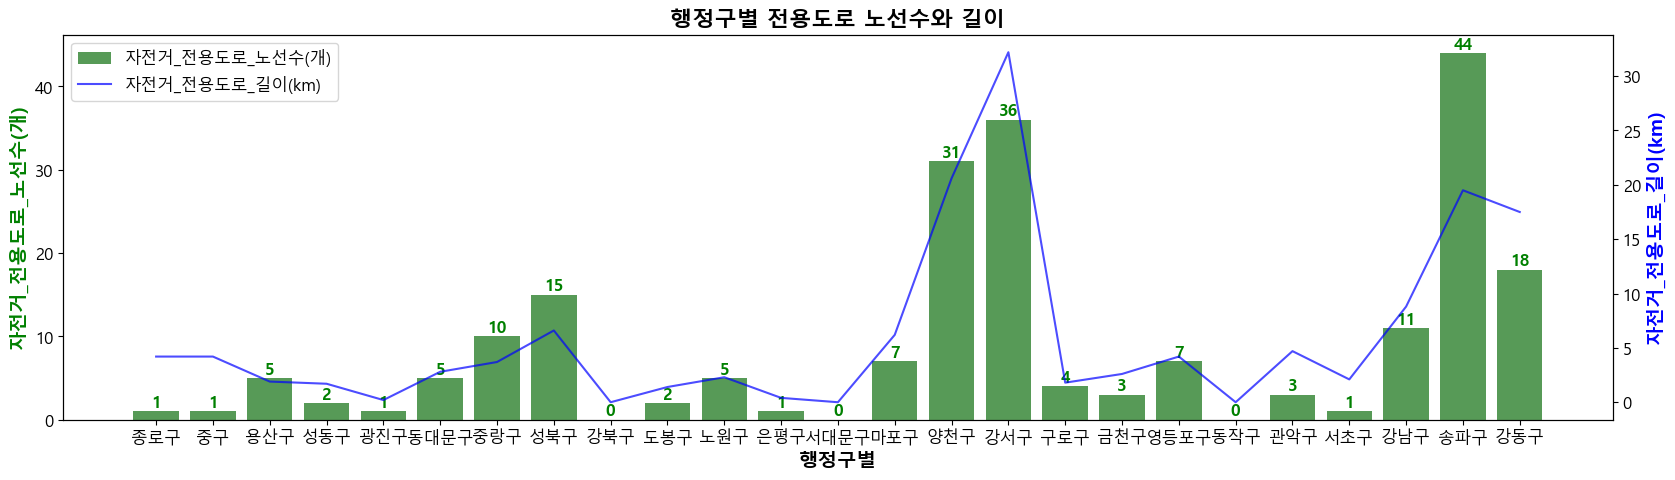

In [13]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

# 첫 번째 y축에 대한 바 그래프
sb.barplot(data=df_bike_only, x='지역별', y='자전거_전용도로_노선수(개)', label='자전거_전용도로_노선수(개)', ax=ax1, color='green', alpha=0.7)
ax1.bar_label(ax1.containers[0], fontsize=12, color='green', fontweight='bold')  # 바 위에 라벨 추가



# 두 번째 y축에 대한 라인 그래프
sb.lineplot(data=df_bike_only, x='지역별', y='자전거_전용도로_길이(km)', label='자전거_전용도로_길이(km)', ax=ax2, color='blue', alpha=0.7)

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 축 레이블 설정
ax1.set_xlabel('행정구별', fontsize=14, color='black', fontweight='bold')
ax1.set_ylabel('자전거_전용도로_노선수(개)', fontsize=14, color='green', fontweight='bold')
ax2.set_ylabel('자전거_전용도로_길이(km)', fontsize=14, color='blue', fontweight='bold')

plt.title('행정구별 전용도로 노선수와 길이', fontsize=16, fontweight='bold')

plt.show()
plt.close()


행정구별 `자전거 전용도로` 노선 수와 길이를 확인해 본 결과 송파구,강서구,양천구 순으로 노선 및 길이가 많은 것을 알 수 있다.

In [17]:
df_twoway=df1.filter(['지역별','자전거보행자_겸용도로_노선수(개)','자전거보행자_겸용도로길이(km)'])
df_twoway.head()

,지역별,자전거보행자_겸용도로_노선수(개),자전거보행자_겸용도로길이(km)
1,종로구,13,10.9
2,중구,6,7.5
3,용산구,11,10.2
4,성동구,18,15.9
5,광진구,43,43.2


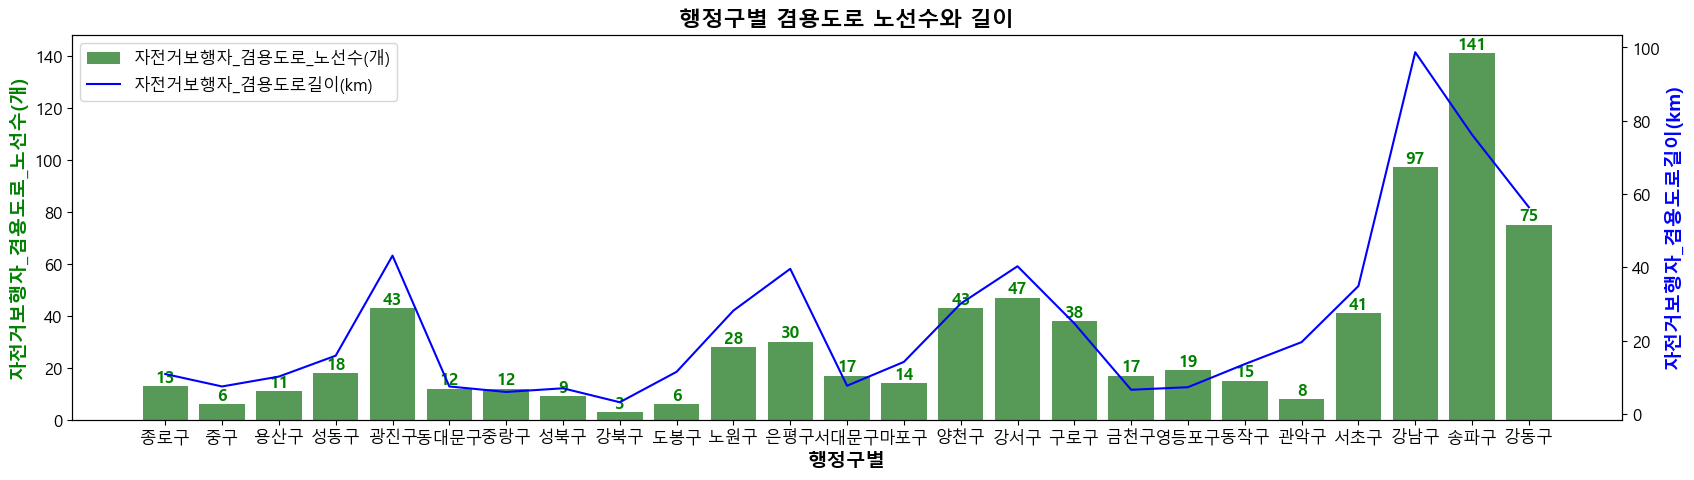

In [23]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

# 첫 번째 y축에 대한 바 그래프
sb.barplot(data=df_twoway, x='지역별', y='자전거보행자_겸용도로_노선수(개)', label='자전거보행자_겸용도로_노선수(개)', ax=ax1, color='green', alpha=0.7)
ax1.bar_label(ax1.containers[0], fontsize=12, color='green', fontweight='bold')  # 바 위에 라벨 추가



# 두 번째 y축에 대한 라인 그래프
sb.lineplot(data=df_twoway, x='지역별', y='자전거보행자_겸용도로길이(km)', label='자전거보행자_겸용도로길이(km)', ax=ax2, color='blue')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 축 레이블 설정
ax1.set_xlabel('행정구별', fontsize=14, color='black', fontweight='bold')
ax1.set_ylabel('자전거보행자_겸용도로_노선수(개)', fontsize=14, color='green', fontweight='bold')
ax2.set_ylabel('자전거보행자_겸용도로길이(km)', fontsize=14, color='blue', fontweight='bold')

plt.title('행정구별 겸용도로 노선수와 길이', fontsize=16, fontweight='bold')

plt.show()
plt.close()


겸용도로 그래프 확인 결과 송파구, 강남구, 강동구 순으로 노선 및 길이가 많은 것으로 나타남

In [26]:
df_bike_road=df1.filter(['지역별','자전거_전용차로_노선수(개)','자전거_전용차로_길이(km)'])
df_bike_road.head()

,지역별,자전거_전용차로_노선수(개),자전거_전용차로_길이(km)
1,종로구,13.0,6.9
2,중구,0.0,0.0
3,용산구,0.0,0.0
4,성동구,3.0,2.0
5,광진구,1.0,0.3


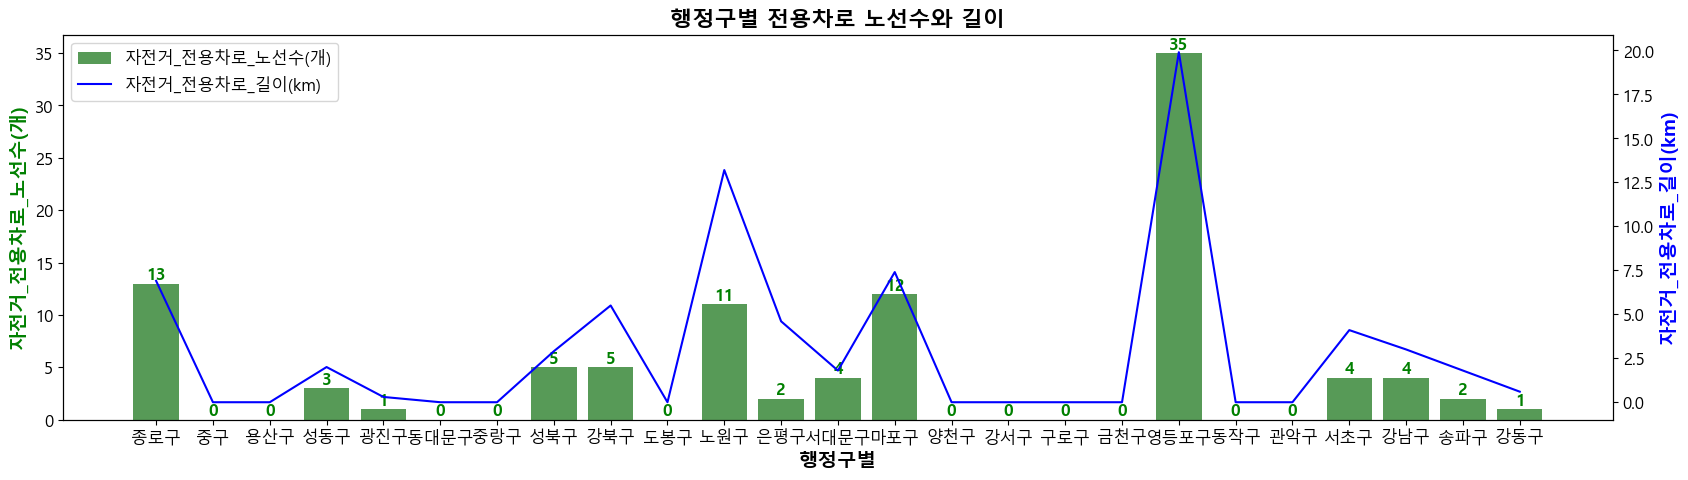

In [29]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

# 첫 번째 y축에 대한 바 그래프
sb.barplot(data=df_bike_road, x='지역별', y='자전거_전용차로_노선수(개)', label='자전거_전용차로_노선수(개)', ax=ax1, color='green', alpha=0.7)
ax1.bar_label(ax1.containers[0], fontsize=12, color='green', fontweight='bold')  # 바 위에 라벨 추가



# 두 번째 y축에 대한 라인 그래프
sb.lineplot(data=df_bike_road, x='지역별', y='자전거_전용차로_길이(km)', label='자전거_전용차로_길이(km)', ax=ax2, color='blue')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 축 레이블 설정
ax1.set_xlabel('행정구별', fontsize=14, color='black', fontweight='bold')
ax1.set_ylabel('자전거_전용차로_노선수(개)', fontsize=14, color='green', fontweight='bold')
ax2.set_ylabel('자전거_전용차로_길이(km)', fontsize=14, color='blue', fontweight='bold')

plt.title('행정구별 전용차로 노선수와 길이', fontsize=16, fontweight='bold')

plt.show()
plt.close()


행정구별 전용차로를 그래프로 확인한 결과 영등포구가 압도적으로 높은것으로 확인되었다.

In [30]:
df1.head()

,지역별,노선수(개)_소계,길이(km)_소계,자전거_전용도로_노선수(개),자전거_전용도로_길이(km),자전거보행자_겸용도로_노선수(개),자전거보행자_겸용도로길이(km),자전거_전용차로_노선수(개),자전거_전용차로_길이(km),자전거우선도로_노선수(개),자전거우선도로_길이(km)
1,종로구,43,32.1,1.0,4.2,13,10.9,13.0,6.9,16.0,10.1
2,중구,21,22.4,1.0,4.2,6,7.5,0.0,0.0,14.0,10.7
3,용산구,26,32.5,5.0,1.9,11,10.2,0.0,0.0,10.0,20.4
4,성동구,32,27.8,2.0,1.7,18,15.9,3.0,2.0,9.0,8.2
5,광진구,50,48.3,1.0,0.2,43,43.2,1.0,0.3,5.0,4.6


In [31]:
df_bike_first=df1.filter(['지역별','자전거우선도로_노선수(개)','자전거우선도로_길이(km)'])
df_bike_first.head()

,지역별,자전거우선도로_노선수(개),자전거우선도로_길이(km)
1,종로구,16.0,10.1
2,중구,14.0,10.7
3,용산구,10.0,20.4
4,성동구,9.0,8.2
5,광진구,5.0,4.6


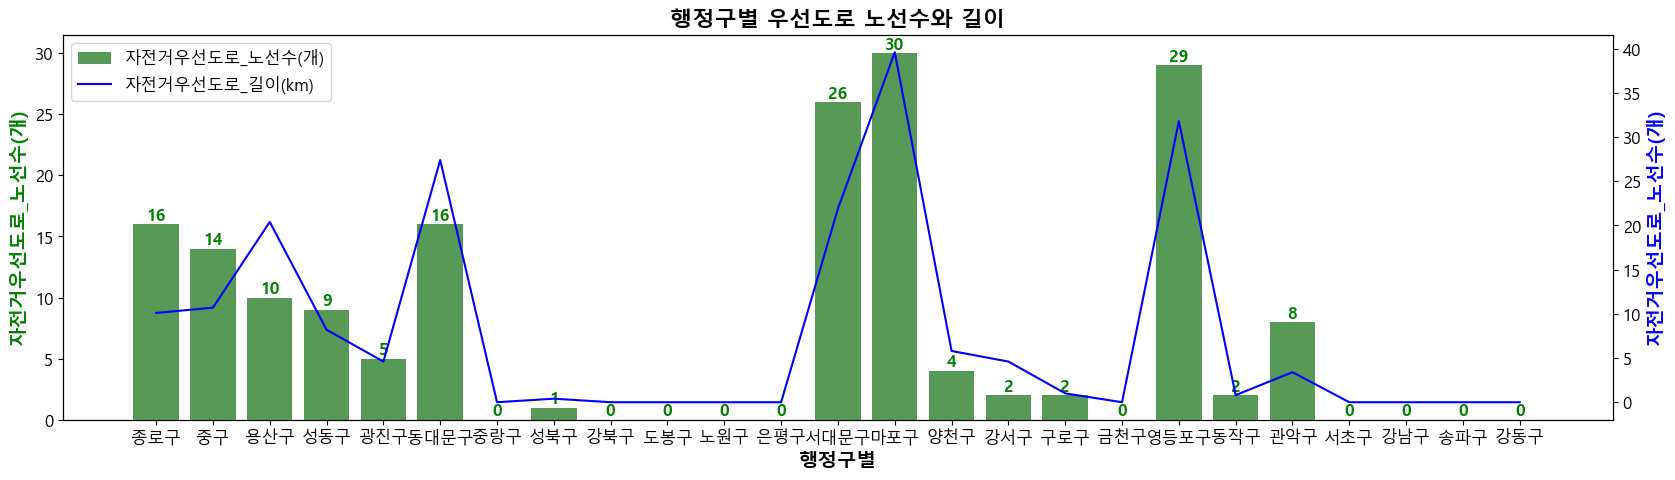

In [32]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

# 첫 번째 y축에 대한 바 그래프
sb.barplot(data=df_bike_first, x='지역별', y='자전거우선도로_노선수(개)', label='자전거우선도로_노선수(개)', ax=ax1, color='green', alpha=0.7)
ax1.bar_label(ax1.containers[0], fontsize=12, color='green', fontweight='bold')  # 바 위에 라벨 추가



# 두 번째 y축에 대한 라인 그래프
sb.lineplot(data=df_bike_first, x='지역별', y='자전거우선도로_길이(km)', label='자전거우선도로_길이(km)', ax=ax2, color='blue')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 축 레이블 설정
ax1.set_xlabel('행정구별', fontsize=14, color='black', fontweight='bold')
ax1.set_ylabel('자전거우선도로_노선수(개)', fontsize=14, color='green', fontweight='bold')
ax2.set_ylabel('자전거우선도로_노선수(개)', fontsize=14, color='blue', fontweight='bold')

plt.title('행정구별 우선도로 노선수와 길이', fontsize=16, fontweight='bold')

plt.show()
plt.close()


행정구별 자전거 우선도로 정보를 그래프로 확인한 결과 마포구와 영등포구, 서대문구 순으로 높은것으로 나타났다.

### 종합적으로 확인하기 위해 총 노선 및 총 길이 확인작업

In [ ]:
df_total=df1.filter(['지역별','노선수(개)_소계','길이(km)_소계'])
df_total.head()

,지역별,노선수(개)_소계,길이(km)_소계
1,종로구,43,32.1
2,중구,21,22.4
3,용산구,26,32.5
4,성동구,32,27.8
5,광진구,50,48.3


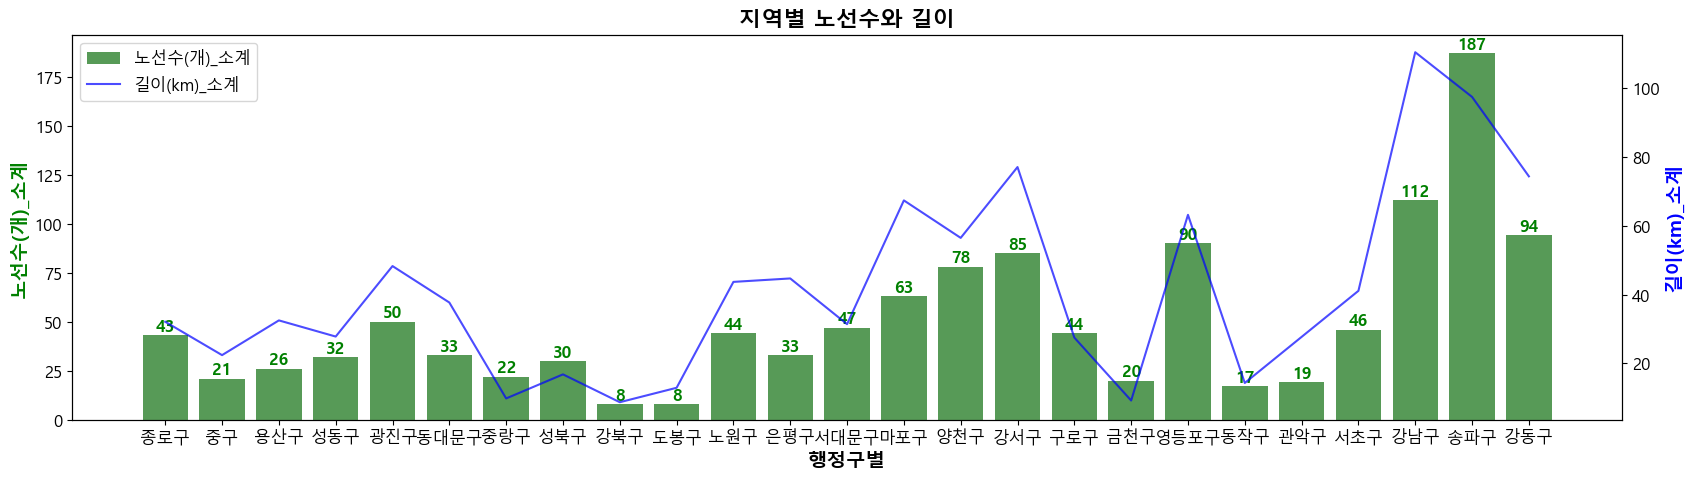

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

# 첫 번째 y축에 대한 바 그래프
sb.barplot(data=df_total, x='지역별', y='노선수(개)_소계', label='노선수(개)_소계', ax=ax1, color='green', alpha=0.7)
ax1.bar_label(ax1.containers[0], fontsize=12, color='green', fontweight='bold')  # 바 위에 라벨 추가



# 두 번째 y축에 대한 라인 그래프
sb.lineplot(data=df_total, x='지역별', y='길이(km)_소계', label='길이(km)_소계', ax=ax2, color='blue', alpha=0.7)

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 축 레이블 설정
ax1.set_xlabel('행정구별', fontsize=14, color='black', fontweight='bold')
ax1.set_ylabel('노선수(개)_소계', fontsize=14, color='green', fontweight='bold')
ax2.set_ylabel('길이(km)_소계', fontsize=14, color='blue', fontweight='bold')

plt.title('지역별 노선수와 길이', fontsize=16, fontweight='bold')

plt.show()
plt.close()


본 그래프는 행정구별 자전거 도로 총 노선 갯수 및 총 길이를 표현했다. 그래프를 확인하자면 몇 가지 사실을 알 수 있다.

우선 노선이 가장 많은 곳은 의외로 송파구,강남구,강동구 순으로 되어있다. 송파구 및 강남구가 노선 및 자전거도로 길이 순위 높은것을 확인하기 

위해 인터넷 정보 검색 결과 `서울시 스마트 맵`이라는 웹사이트를 찾을 수 있었다.

![img](res/bike_map.png)

사진 파일을 보면 알 수 있다시피 강남구와 송파구에 자전거 도로가 몰려있는 것을 알 수 있고 수치상으로도 도로 수 및 길이가 긴것을 알 수 있다. 다만 강남 및 송파구는 인파 및 차량이 항상 몰리는 장소 중 하나인데 이것만으로는 확인 할 수 없어 네이버지도뷰에서 직접 확인을 해보기로 했다. 

![img](res/1.png)

해당 위치는 학동역에서 강남구청을 가는 길목을 네이버 로드뷰에서 확인한 것이다. 보면 알수 있듯이 차도 양쪽으로 보도가 있는데 자전거가 지나가기는 매우 힘든 장소이다. 그러므로 송파구 및 강남구가 도로가 많다고 하더라도 아마 이런 종류의 도로일 확률이 매우 높을 수 있겠다. 

-> 그러므로 자전거 도로에 한해서 강남구 및 송파구는 입지 선정 제외에 근거가 됨.